# Challenge2

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [4]:
df[['Name', 'Age']].head(10)

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
5,"Moran, Mr. James",NaN
6,"McCarthy, Mr. Timothy J",54.0
7,"Palsson, Master. Gosta Leonard",2.0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0


## 1단계

In [5]:
# 이름에 들어가는 Mr. Mrs. Miss. Master. 타이틀 정보 뽑기
df.loc[ df['Name'].str.contains('Mr\.'), 'Name' ] = 'Mr'
df.loc[ df['Name'].str.contains('Mrs\.'), 'Name' ] = 'Mrs'
df.loc[ df['Name'].str.contains('Miss\.'), 'Name' ] = 'Miss'
df.loc[ df['Name'].str.contains('Master\.'), 'Name' ] = 'Master'
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df['Name'] = df['Name'].map({
    'Mr': 0,
    'Mrs': 1,
    'Miss': 2,
    'Master': 3
})

df['Name'] = df['Name'].fillna(4)

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0.0,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1.0,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,2.0,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1.0,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0.0,male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,0.0,male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,0.0,male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,3.0,male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,1.0,female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,1.0,female,14.0,1,0,237736,30.0708,NaN,C


## 2단계

In [8]:
df['Age'] = df['Age'].fillna( df.groupby('Name')['Age'].transform('mean') )

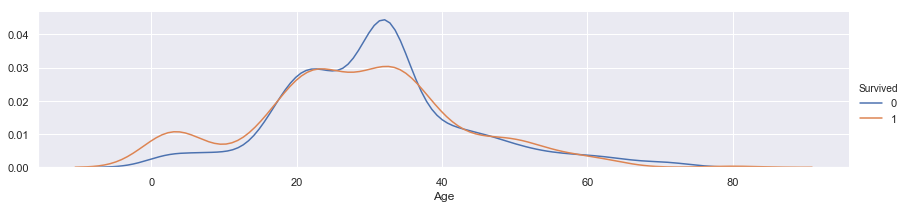

In [10]:
facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age')
facet.add_legend()

plt.show()